In [1]:
# Find hits from Cas9 screen
# Create table with pre-screen freqs and post-screen freqs for each library member and each replicate

In [2]:
cas9_mutations = [("CCG", "CTC"),
                  ("CTG", "TGC"),
                  ("TAC", "CAG"),
                  ("AGC", "CAT", "TGT"),
                  ("AGC", "TGT"),
                  ("TTT", "ACC"),
                  ("CTG", "ACC", "GGA"),
                  ("CTT", "GGA"),
                  ("CTT", "CAG"),
                  ("TTG", "GAC"),
                  ("TTT", "GCC"),
                  ("CTT", "CCC", "GGA"),
                  ("CTG", "GAC"),
                  ("TAC", "AAG", "GGA"),
                  ("CTC", "GGA"),
                  ("ATA", "CAG"),
                  ("CTC", "GCT", "GAG"),
                  ("TAC", "CAG")
                  ]

In [54]:
import pandas as pd
import numpy as np

pre = pd.read_csv("pre-counts-1a.csv", header=None, dtype=str, names=("genotype", "counts"))
post_r1 = pd.read_csv("post/r1_counts-1a.csv", header=None, dtype=str, names=("genotype", "counts"))
post_r2 = pd.read_csv("post/r2_counts-1a.csv", header=None, dtype=str, names=("genotype", "counts"))

In [55]:
totals = {'pre': sum(map(int,pre["counts"])), 'r1': sum(map(int,post_r1["counts"])), 'r2': sum(map(int,post_r2["counts"]))}
totals

{'pre': 483323, 'r1': 220258, 'r2': 296896}

In [56]:
big = pd.concat([pre, post_r1["counts"], post_r2["counts"]], axis=1)
big.columns = ("genotype", "pre_n", "r1_n", "r2_n")
big["pre_n"] = pd.Series(map(int, big["pre_n"]))
big["r1_n"] = pd.Series(map(int, big["r1_n"]))
big["r2_n"] = pd.Series(map(int, big["r2_n"]))  

In [57]:
big["pre_freq"] = big["pre_n"]/totals["pre"]
big["r1_freq"] = big["r1_n"]/totals["r1"]
big["r2_freq"] = big["r2_n"]/totals["r2"]


In [58]:
big["r1_fc"] = big["r1_freq"]/big["pre_freq"]
big["r2_fc"] = big["r2_freq"]/big["pre_freq"]
big["avg_fc"] = np.sqrt(big["r1_fc"]*big["r2_fc"])
big["disc"] = abs((big["r1_fc"]-big["r2_fc"])/big["avg_fc"])

In [59]:
big.sort_values("pre_n", ascending=False)

,genotype,pre_n,r1_n,r2_n,pre_freq,r1_freq,r2_freq,r1_fc,r2_fc,avg_fc,disc
0,000000000000000000,35497,74748,96514,0.073444,0.339366,0.325077,4.620763,4.426208,4.522439,0.043020
746496,100000000000000000,4795,5838,7709,0.009921,0.026505,0.025965,2.671660,2.617234,2.644307,0.020582
186624,001000000000000000,2310,3941,4900,0.004779,0.017893,0.016504,3.743693,3.453164,3.595495,0.080804
12,000000000000001000,2172,5481,7059,0.004494,0.024884,0.023776,5.537398,5.290741,5.412665,0.045570
1728,000000001000000000,2106,5938,10902,0.004357,0.026959,0.036720,6.187107,8.427154,7.220782,0.310222
...,...,...,...,...,...,...,...,...,...,...,...
626955,011100010110120011,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
626953,011100010110120001,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
626952,011100010110120000,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
626951,011100010110111121,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [9]:
small = big.dropna(thresh=10)
small

,genotype,pre_n,r1_n,r2_n,pre_freq,r1_freq,r2_freq,r1_fc,r2_fc,avg_fc,disc
0,000000000000000000,35497,74748,96514,0.073444,0.339366,0.325077,4.620763,4.426208,4.522439,0.043020
1,000000000000000001,2029,2653,3361,0.004198,0.012045,0.011320,2.869201,2.696619,2.781572,0.062045
2,000000000000000010,2035,3866,5063,0.004210,0.017552,0.017053,4.168725,4.050201,4.109036,0.028845
3,000000000000000011,417,180,262,0.000863,0.000817,0.000882,0.947201,1.022818,0.984284,0.076824
4,000000000000000020,710,850,996,0.001469,0.003859,0.003355,2.627038,2.283674,2.449346,0.140186
...,...,...,...,...,...,...,...,...,...,...,...
1492970,111211210112120010,1,0,0,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1492974,111211210112120100,1,0,0,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1492981,111211210112121001,1,0,0,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1492984,111211210112121020,2,0,0,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [10]:
pre_0 = big[big["r1_n"]*big["r2_n"] > 0]
small = pre_0

In [11]:
small["genotype"] = "n-"+small["genotype"]

<ipython-input-11-eed3e0be4574>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small["genotype"] = "n-"+small["genotype"]


In [12]:
small.to_csv("minion_hits.csv")

In [13]:
smaller = small
#smaller = smaller[["genotype", "pre_freq", "r1_freq", "r2_freq", "r1_fc", "r2_fc"]]

In [14]:
smaller["geo_avg_fc"] = np.sqrt(smaller["r1_fc"]*smaller["r2_fc"])

<ipython-input-14-e7afa59e1615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller["geo_avg_fc"] = np.sqrt(smaller["r1_fc"]*smaller["r2_fc"])


In [15]:
n_mut = []
for x in smaller["genotype"]:
    n_mut.append(sum([y in ('1', '2') for y in x]))
        
smaller["n_mutations"] = n_mut

<ipython-input-15-c9ebd4922ec5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller["n_mutations"] = n_mut


In [16]:
smaller["disc"] = abs((smaller["r1_fc"]-smaller["r2_fc"])/smaller["geo_avg_fc"])

<ipython-input-16-291485ab5bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller["disc"] = abs((smaller["r1_fc"]-smaller["r2_fc"])/smaller["geo_avg_fc"])


In [17]:
smaller

,genotype,pre_n,r1_n,r2_n,pre_freq,r1_freq,r2_freq,r1_fc,r2_fc,avg_fc,disc,geo_avg_fc,n_mutations
0,n-000000000000000000,35536,74748,96514,0.073542,0.339366,0.325077,4.614594,4.420298,4.516401,0.043020,4.516401,0
1,n-000000000000000001,2078,2653,3361,0.004300,0.012045,0.011320,2.800878,2.632405,2.715335,0.062045,2.715335,1
2,n-000000000000000010,1986,3866,5063,0.004110,0.017552,0.017053,4.270562,4.149143,4.209415,0.028845,4.209415,1
3,n-000000000000000011,411,180,262,0.000851,0.000817,0.000882,0.960800,1.037503,0.998415,0.076824,0.998415,2
4,n-000000000000000020,714,850,996,0.001478,0.003859,0.003355,2.611699,2.270340,2.435045,0.140186,2.435045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430808,n-111200000000010000,9,1,1,0.000019,0.000005,0.000003,0.243759,0.180837,0.209954,0.299693,0.209954,5
1431792,n-111200000101000000,0,1,1,0.000000,0.000005,0.000003,inf,inf,inf,NaN,inf,6
1439120,n-111200101110120110,0,1,2,0.000000,0.000005,0.000007,inf,inf,inf,NaN,inf,12
1446615,n-111201000001121011,0,2,1,0.000000,0.000009,0.000003,inf,inf,inf,NaN,inf,11


In [18]:
smaller.to_csv("minion_hits-1a.csv")

/Users/nathan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


r^2 (excluding wt) = 0.9250457425925608


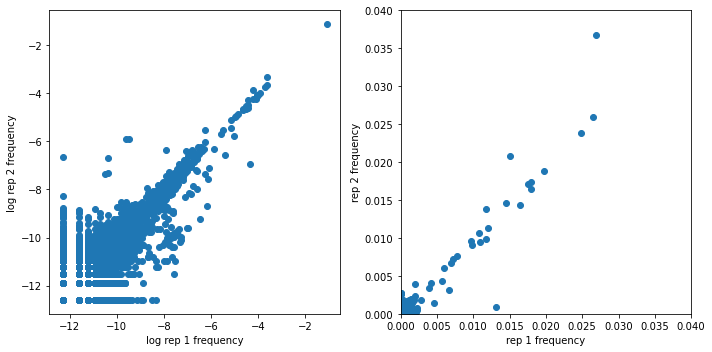

In [60]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].scatter(np.log(big["r1_freq"]), np.log(big["r2_freq"]))
axes[0].set(xlabel="log rep 1 frequency")
axes[0].set(ylabel="log rep 2 frequency")
axes[1].scatter(big["r1_freq"], big["r2_freq"])
axes[1].set(xlabel="rep 1 frequency")
axes[1].set(ylabel="rep 2 frequency")
axes[1].set(xlim=[0,0.04])
axes[1].set(ylim=[0,0.04])
plt.tight_layout()

print(f'r^2 (excluding wt) = {np.corrcoef(big["r1_freq"][1:], big["r2_freq"][1:])[0,1]**2}')

In [9]:
# mutation counts

def dict_add(d, key, value):
    if key in d:
        d[key] += value
    else:
        d[key] = value
    return d

pre_mut_count = dict()
r1_mut_count = dict()
r2_mut_count = dict()

for i, row in big.iterrows():
    mut_count = sum([x != '0' for x in row['genotype']])
    pre_mut_count = dict_add(pre_mut_count, mut_count, row['pre_n'])
    r1_mut_count = dict_add(r1_mut_count, mut_count, row['r1_n'])
    r2_mut_count = dict_add(r2_mut_count, mut_count, row['r2_n'])



In [10]:
from itertools import product as iter_product
from collections import Counter
from random import choice

element_counts = {item: 0 for item in iter_product(*(range(len(i)) for i in cas9_mutations))}
for key in list(element_counts.keys()): # Cannot have both mutations 7 and 8, only one or wt
    if key[7] == 1 and key[8] == 1:
        del element_counts[key]
options = list(element_counts.keys())
n = totals['pre']
theo = [choice(options) for i in range(n)]
theo_dist = Counter(theo)
theo_number = Counter([sum([x != 0 for x in y]) for y in theo])

x = range(19)
pre_y = list()
r1_y = list()
r2_y = list()
theo_y = list()
for i in x:
    pre_mut_count = dict_add(pre_mut_count, i, 0)
    r1_mut_count = dict_add(r1_mut_count, i, 0)
    r2_mut_count = dict_add(r2_mut_count, i, 0)
    pre_y.append(pre_mut_count[i]/totals['pre'])
    r1_y.append(r1_mut_count[i]/totals['r1'])
    r2_y.append(r2_mut_count[i]/totals['r2'])
    theo_y.append(theo_number[i]/totals['pre'])


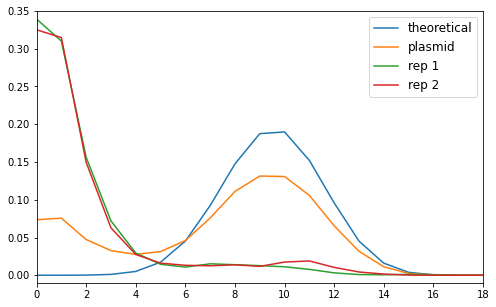

In [11]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

plt.plot(x, theo_y)
plt.plot(x, pre_y)
plt.plot(x, r1_y)
plt.plot(x, r2_y)
plt.legend(labels=("theoretical", "plasmid", "rep 1", "rep 2"), fontsize='large')
plt.xlim((0,18))
plt.ylim((-.01,0.35))
plt.show()

In [12]:
with open("n_mutation_hist_data.csv", mode='w') as outfile:
    print("n_mutations,theoretical,plasmid,replicate_1,replicate_2", file=outfile)
    for i in range(len(theo_y)):
        print(x[i],theo_y[i],pre_y[i],r1_y[i],r2_y[i], sep=',', file=outfile)
        
    

In [19]:
big.head()

,genotype,pre_n,r1_n,r2_n,pre_freq,r1_freq,r2_freq,r1_fc,r2_fc,avg_fc,disc
0,000000000000000000,35497,74748,96514,0.073444,0.339366,0.325077,4.620763,4.426208,4.522439,0.043020
1,000000000000000001,2029,2653,3361,0.004198,0.012045,0.011320,2.869201,2.696619,2.781572,0.062045
2,000000000000000010,2035,3866,5063,0.004210,0.017552,0.017053,4.168725,4.050201,4.109036,0.028845
3,000000000000000011,417,180,262,0.000863,0.000817,0.000882,0.947201,1.022818,0.984284,0.076824
4,000000000000000020,710,850,996,0.001469,0.003859,0.003355,2.627038,2.283674,2.449346,0.140186


In [26]:
totals['pre']

483208

In [14]:
genotype_list_r1 = []
genotype_list_r2 = []
for j, row in big.iterrows():
    for k in range(row["r2_n"]):
        genotype_list_r2.append(row['genotype'])
    for k in range(row["r1_n"]):
        genotype_list_r1.append(row['genotype'])


In [15]:
print(len(genotype_list_r2))
genotype_list_r2[:10]

296896


['000000000000000000',
 '000000000000000000',
 '000000000000000000',
 '000000000000000000',
 '000000000000000000',
 '000000000000000000',
 '000000000000000000',
 '000000000000000000',
 '000000000000000000',
 '000000000000000000']

[136338, 47764]
[142295, 41807]
[144011, 40091]
[133583, 35542, 14977]
[144897, 39205]
[133237, 50865]
[122928, 33140, 28034]
[164859, 19243]
[137864, 46238]
[152900, 31202]
[147555, 36547]
[126148, 32455, 25499]
[135090, 49012]
[124349, 30560, 29193]
[138814, 45288]
[148600, 35502]
[129129, 40305, 14668]
[152088, 32014]


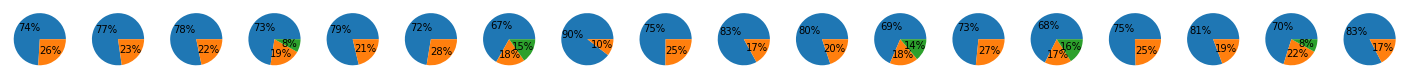

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=18, sharey=True, figsize=(25,20))
    
for i in range(18):
    dist = [0]*len(cas9_mutations[i])
    for genotype in genotype_list_r1:
        if genotype.count('0') < 17:
            dist[int(genotype[i])] += 1
    for genotype in genotype_list_r2:
        if genotype.count('0') < 17:
            dist[int(genotype[i])] += 1
    axes[i].pie(dist, autopct='%.0f%%')
    print(dist)

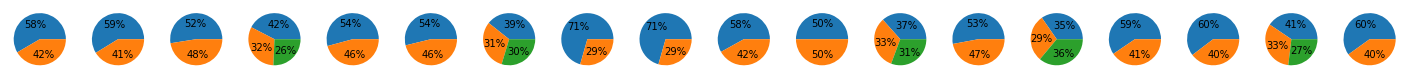

In [22]:
pre_genotype_list = []
for j, row in big.iterrows():
    for k in range(row["pre_n"]):
        pre_genotype_list.append(row['genotype'])

fig, axes = plt.subplots(nrows=1, ncols=18, sharey=True, figsize=(25,20))
    
for i in range(18):
    dist = [0]*len(cas9_mutations[i])
    for genotype in pre_genotype_list:
        if genotype.count('0') < 17:
            dist[int(genotype[i])] += 1
    axes[i].pie(dist, autopct='%.0f%%')

In [45]:
full_data = pd.read_csv("/Users/nathan/PycharmProjects/nanocombi/raw_fig_data/new_Cas9_hits.csv", header=0)
full_data.head()

,Unnamed: 0,genotype,pre_n,pre_RPM,r1_n,r1_RPM,r2_n,r2_RPM,pre_freq,r1_freq,r2_freq,r1_fc,r2_fc,avg_fc,disc,n_mutations,r1/r2
0,0,n-000000000000000000,35431,71516.4,74748.0,339365.7,96514.0,325076.8,0.073324,0.339366,0.325077,4.6,4.4,4.5,0.0,0,NaN
1,1,n-000000000000000001,2054,4145.9,2653.0,12045.0,3361.0,11320.5,0.004251,0.012045,0.011320,2.8,2.7,2.7,0.1,1,NaN
2,2,n-000000000000000010,1991,4018.8,3866.0,17552.1,5063.0,17053.1,0.004120,0.017552,0.017053,4.3,4.1,4.2,0.0,1,NaN
3,3,n-000000000000000011,430,867.9,180.0,817.2,262.0,882.5,0.000890,0.000817,0.000882,0.9,1.0,1.0,0.1,2,NaN
4,4,n-000000000000000020,708,1429.1,850.0,3859.1,996.0,3354.7,0.001465,0.003859,0.003355,2.6,2.3,2.5,0.1,1,NaN


r^2 (excluding wt) = 0.9349361812384716


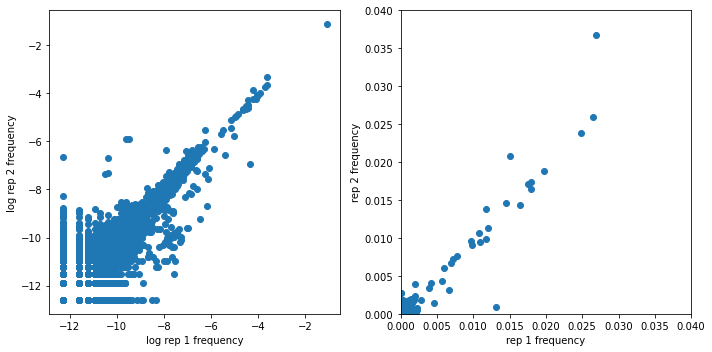

In [46]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].scatter(np.log(full_data["r1_freq"]), np.log(full_data["r2_freq"]))
axes[0].set(xlabel="log rep 1 frequency")
axes[0].set(ylabel="log rep 2 frequency")
axes[1].scatter(full_data["r1_freq"], full_data["r2_freq"])
axes[1].set(xlabel="rep 1 frequency")
axes[1].set(ylabel="rep 2 frequency")
axes[1].set(xlim=[0,0.04])
axes[1].set(ylim=[0,0.04])
plt.tight_layout()

print(f'r^2 (excluding wt) = {np.corrcoef(full_data["r1_freq"][1:], full_data["r2_freq"][1:])[0,1]**2}')

In [53]:
np.corrcoef(full_data["r1_freq"][1:], full_data["r2_freq"][1:])[0,1]**2

0.9349361812384716

In [49]:
full_data["r2_freq"][1:]

1       0.011320
2       0.017053
3       0.000882
4       0.003355
5       0.000104
          ...   
4136    0.000003
4137    0.000003
4138    0.000007
4139    0.000003
4140    0.000003
Name: r2_freq, Length: 4140, dtype: float64

In [30]:
pre_genotype_list = []
r1_genotypes = []
r2_genotypes = []
for j, row in full_data.iterrows():
    for k in range(int(row["Plasmid_counts"])):
        pre_genotype_list.append(row['Genotype'])
    for l in range(int(row["Rep_1_counts"])):
        r1_genotypes.append(row['Genotype'])
    for m in range(int(row["Rep_2_counts"])):
        r2_genotypes.append(row['Genotype'])

[240312, 171134]
[241806, 169640]
[216010, 195436]
[174637, 131267, 105542]
[223108, 188338]
[221440, 190006]
[161914, 127511, 122021]
[290319, 121127]
[290424, 121022]
[239011, 172435]
[205890, 205556]
[150715, 134537, 126194]
[217785, 193661]
[142659, 120261, 148526]
[244845, 166601]
[248314, 163132]
[166884, 133981, 110581]
[246546, 164900]


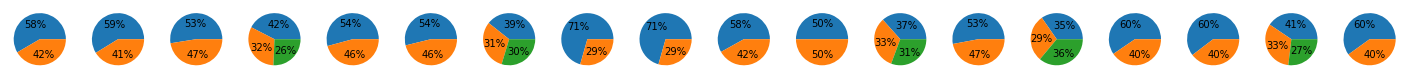

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=18, sharey=True, figsize=(25,20))
    
for i in range(18):
    dist = [0]*len(cas9_mutations[i])
    for genotype in pre_genotype_list:
        if genotype.count('0') < 17:
            dist[int(genotype[i])] += 1
    axes[i].pie(dist, autopct='%.0f%%')
    print(dist)

[136338, 47764]
[142295, 41807]
[144011, 40091]
[133583, 35542, 14977]
[144897, 39205]
[133237, 50865]
[122928, 33140, 28034]
[164859, 19243]
[137864, 46238]
[152900, 31202]
[147555, 36547]
[126148, 32455, 25499]
[135090, 49012]
[124349, 30560, 29193]
[138814, 45288]
[148600, 35502]
[129129, 40305, 14668]
[152088, 32014]


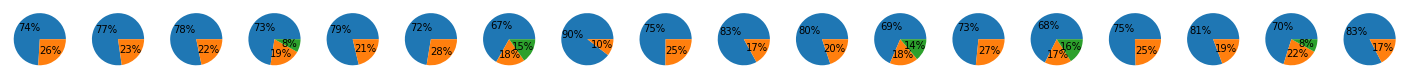

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=18, sharey=True, figsize=(25,20))

for i in range(18):
    dist = [0]*len(cas9_mutations[i])
    for genotype in r1_genotypes:
        if genotype.count('0') < 17:
            dist[int(genotype[i])] += 1
    for genotype in r2_genotypes:
        if genotype.count('0') < 17:
            dist[int(genotype[i])] += 1
    axes[i].pie(dist, autopct='%.0f%%')
    print(dist)